## Lab Quiz 1

**You have 80 minutes. You are allowed to use one A4 cheatsheet. You are not allowed to use the internet. You will receive full score if you obtain at least 5 points.**

By taking this quiz, you agree to the following conditions:

- **Do not share or distribute** any quiz questions, answers, or content with others, including those who have not yet taken the quiz.
- **Maintaining fairness and upholding academic integrity are your responsibilities.** Sharing quiz materials compromises the fairness of the assessment for all students.
- **Any breach of this policy will be considered a violation of academic integrity and may result in disciplinary action.**

### Problem 1

The goal of this exercise is examining how does the noise influence the ROC curves.

In this problem we receive signals from four different cities: Dubai, Riyahd, Istanbul and New York. Each of the four cities sends a string of $0$'s and $1$'s of length $n$ i.e. 
$$
Y_i \in\{0,1\}^n,
$$
where $Y_1, Y_2, Y_3, Y_4$ denote signals from Dubai, Riyahd, Istanbul, and New York respectively.

Due to the distance from the radio station in Abu Dhabi, where the messages are received, each radio signal $Y_i$ is corrupted by random noise $\epsilon_i\in\mathbb{R}^n$. Thus, instead of the signal $Y_i$, Abu Dhabi radio station receives the corrupted message $X_i = Y_i + \epsilon_i$. You are given that for all $i\in\{1, 2, 3, 4\}$, each of the entries of $\epsilon_i$ is a normal random variable $\mathcal{N}\left(0, \sigma_i^2\right)$ with $(\sigma_1, \sigma_2, \sigma_3, \sigma_4) = (1/10, 1, 3, 100)$. 

Run the following code to generate signals $Y_i$ and the corresponding corrupted messages $X_i$. We shall store the values of $\sigma_i$ in the array called sigmas. That is, sigmas $= [1/10, 1, 3, 100]$. **We will need this later.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

n = 1000
X = [0., 0., 0., 0.]
Y = [0., 0., 0., 0.]
sigmas = [1/10, 1, 3, 100]

rng = np.random.RandomState(1234)

for i in range(len(sigmas)):
  Y[i] = rng.binomial(1, 1/2, n)
  X[i] =  Y[i] + sigmas[i] * rng.standard_normal(n)


Given the message $X_i$, we want to classify each of its entries as $0$ or $1$. We know that if $Y_i[j]=0$, then $X_i[j]$ follows the density
$$
f_{i,0}(x) = \frac{1}{\sqrt{2\pi\sigma_i^2}}\exp\left(-\frac{x^2}{2\sigma_i^2}\right).
$$
If $Y_i[j]=1$, then $X_i[j]$ follows the density
$$
f_{i,1}(x) = \frac{1}{\sqrt{2\pi\sigma_i^2}}\exp\left(-\frac{(x-1)^2}{2\sigma_i^2}\right).
$$

---

**Task 1 [0.5 point]:** Implement the function log_L which computes the log-likelihood 



$$
\log \mathcal{L}_i(x) = \log\left(\frac{f_{i, 1}(x)}{f_{i,0}(x)}\right).
$$

It should accept two variables:


*   $x$
*   Index $i$,

and return $\log \mathcal{L}_i(x)$.

Recall that the value of $\sigma_i$ can be accessed by calling sigmas[i].

**Hint:** $$\frac{f_{i, 1}(x)}{f_{i,0}(x)} = \exp\left(-\frac{(x-1)^2}{2\sigma_i^2}+\frac{x^2}{2\sigma_i^2}\right)$$

---

In [2]:
#YOUR ANSWER TO TASK 1
def pdf_normal(x, mu, sigma):
    const_norm = 1 / (np.sqrt(2 * math.pi) * sigma)
    exponent = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return const_norm * exponent

sigmas = [1/10, 1, 3, 100]

def log_L(x, i):
    f_0s = pdf_normal(x, 0, sigmas[i])
    f_1s = pdf_normal(x, 1, sigmas[i])
    log = np.log(f_1s / f_0s)
    return log

---

**Task 2 [0.5 point]:** Implement the function calculating True Positive Rate of a given predictor. As an input it should take:


*   Y_hat, the predictions given by the predictor
*   Y, the actual labels

The output should be $TPR\left(\hat{Y}\right)$.

---


In [3]:
#YOUR ANSWER TO TASK 2

def tpr(y_hat, y):
  #Step 1: Calculate the number of positives (i.e. the number of 1's in y)
  total_positives = sum(y>0)
  
  #Step 2: Calculate the number of true positives
  true_positives = sum(y_hat == y & y>0)

  return true_positives / total_positives

Run the following code to generate the ROC curves for each of the cities.

Text(0.5, 1.0, 'ROC curves')

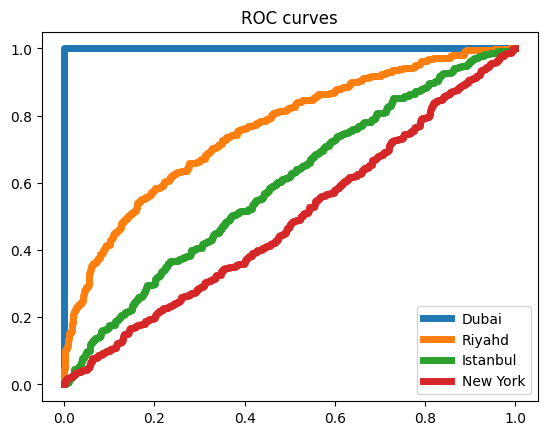

In [4]:
from sklearn.metrics import roc_curve

cities = ['Dubai', 'Riyahd', 'Istanbul', 'New York']
for i in range(4):
    x, y = X[i], Y[i]
    scores = log_L(x, i)
    fpr, tpr, _ = roc_curve(y, scores)
    plt.plot(fpr, tpr, linewidth=5, label=cities[i])
plt.legend(loc = 'lower right')
plt.title('ROC curves')


### Problem 2

In this part, we will implement the Perceptron algorithm with the data as generated below. 

In [5]:
rng = np.random.default_rng(12345)

n = 100
d = 5
X = rng.standard_normal((n, d))
Y = rng.binomial(1, 1/2, n)
Y = 2 * Y - 1

X = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
Q, _ = np.linalg.qr(rng.standard_normal((d + 1, d + 1)))
X = X @ Q

# Try to think why are this data separable?

**Task 3 [1 point]:** Implement the Perceptron Algorithm by filling in the missing parts.

In [6]:
# Perceptron update rule
def update(w, X, y, i):
    x_i, y_i = X[i], y[i]
    if x_i.dot(w) * y_i < 1:
        w += x_i * y_i
    return w

# Empirical risk
def empirical_risk(w, X, Y):
    return np.mean(np.maximum(0, 1 - Y * (np.dot(X, w))))

# Correct predictions
def correct_predictions(w, X, Y):
    return np.mean(Y * (np.dot(X, w)) >= 1)

In [7]:
# Test the implementation
random_seed = 123
max_iter = 1000
eps = 1e-8

# Intialize the model
w = np.zeros(X.shape[1])
losses = []
rng = np.random.default_rng(random_seed)

for j in range(max_iter):
    losses.append(empirical_risk(w, X, Y))
    i = rng.integers(0, len(X))
    w = update(w, X, Y, i)
    if losses[-1] < eps:
        losses.append(empirical_risk(w, X, Y))
        break
        
assert losses[-1] < eps
assert correct_predictions(w, X, Y) == 1

print(f"Model is trained in {j+1} iterations.")

Model is trained in 184 iterations.


**Task 4 [0.5 point]:** Compute the margin of the obtained solution, i.e., the closest distance from the separating hyperplane and point from the training data.

In [8]:
def margin(w, X, Y):
    margin = min(np.abs(X.dot(w)))
    return margin

print(f"Margin of the model is {margin(w, X, Y)}")

Margin of the model is 1.8465723151464761


**Task 5 [0.5 point]:** Adjust your code to also return how many mistakes your Perceptron made.

In [9]:
# Perceptron update rule with missclassified flag
def update(w, X, y, i):
    x_i, y_i = X[i], y[i]
    # YOUR CODE HERE
    # The update rule for the perceptron algorithm
    # with missclassified flag (True/False)
    if x_i.dot(w) * y_i < 1:
        w += x_i * y_i
        missclassified = True
    else:
        missclassified = False
    return w, missclassified

In [10]:
# Test the implementation
random_seed = 123
max_iter = 1000
eps = 1e-8

# Intialize the model
w = np.zeros(X.shape[1])
losses = []
rng = np.random.default_rng(random_seed)
errors = 0

for j in range(max_iter):
    losses.append(empirical_risk(w, X, Y))
    i = rng.integers(0, len(X))
    w, missclassified = update(w, X, Y, i)
    if missclassified:
        errors += 1
    if losses[-1] < eps:
        losses.append(empirical_risk(w, X, Y))
        break
        
assert losses[-1] < eps
assert correct_predictions(w, X, Y) == 1

print(f"The Perceptron algorithm made {errors} errors.")

The Perceptron algorithm made 6 errors.


### Problem 3

In this part, we will work with kernels.

Consider 2D dataset below, where we predict 1 if diameter is less than 1, i.e., $x_1^2 + x^2_2 \leq 1$ ($x_1$ and $x_2$ are first and second coordinates, respectively), otherwise we predict -1.

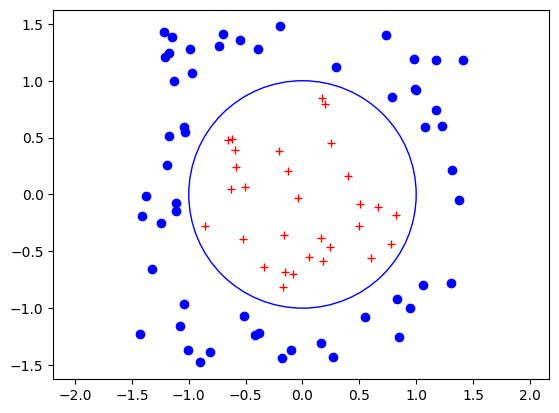

In [11]:
n = 100
n_test = 100
random_seed = 42
rng = np.random.default_rng(random_seed)

X = rng.uniform(-1.5, 1.5, (n, 2))
X_test = rng.uniform(-1.5, 1.5, (n_test, 2))
diameter = np.sqrt(np.sum(X ** 2, axis=1))

X = X[(diameter <= 0.9) + (diameter >= 1.1)]
X_test = X_test[(diameter <= 0.9) + (diameter >= 1.1)]

diameter = np.sqrt(np.sum(X ** 2, axis=1))
y = np.ones(len(X))
y[diameter >= 1] = -1

y_test = np.ones(len(X_test))
diameter_test = np.sqrt(np.sum(X_test ** 2, axis=1))
y_test[diameter_test >= 1] = -1

plt.plot(X[y == -1, 0], X[y == -1, 1], "o", color="b")
plt.plot(X[y == 1, 0], X[y == 1, 1], "+", color="r")
# plot separating circle
circle = plt.Circle((0, 0), 1, color="b", fill=False)
plt.gca().add_patch(circle)
plt.axis("equal")
plt.show()

**Task 6** [2 points]: Use second order polynomial features to construct a nonlinear feature map. Then:

 - Obtain a linear classifier that correctly classifies all the points in the new feature space. Plot the data points and the decision boundary.  
 - Show that the test error of your classifier on `(X_test, y_test)` is 0. and explain why this is the case.

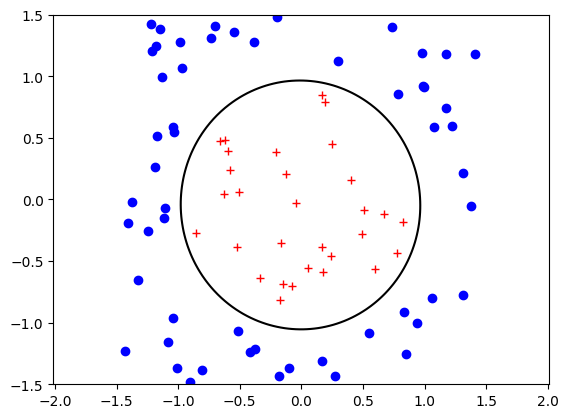

Test error: 0.04


In [18]:
def second_order_polynomial_features(X):
    X_poly = np.hstack((0 * X[:, 0:1] + 1, X,  X[:, 0:1] * X[:, 1:], X[:, 0:1] ** 2, X[:, 1:] ** 2))
    return X_poly

X_poly = second_order_polynomial_features(X)

# fix random seed
random_seed = 42
rng = np.random.default_rng(random_seed)

# compute the polynomial features
w = np.zeros(6)

while True: 
    y_pred = y * X_poly.dot(w)
    if np.all(y_pred >= 1):
        break
    i = rng.integers(len(X))
    if y_pred[i] < 1:
        w += y[i] * X_poly[i]

# plot the data points
plt.plot(X[y == -1, 0], X[y == -1, 1], "o", color="b")
plt.plot(X[y == 1, 0], X[y == 1, 1], "+", color="r")
# plot polynomial boundary
x = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, x)
Z = second_order_polynomial_features(np.c_[xx.ravel(), yy.ravel()]).dot(w)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors="k")
plt.axis("equal")
plt.show()

# test error
# COMPUTE TEST ERROR on X_test, y_test
X_test_poly = second_order_polynomial_features(X_test)
y_test_pred = X_test_poly.dot(w)
test_error = np.sum((y_test * y_test_pred) < 0) / len(y_test)

print(f"Test error: {test_error:.2f}")
# PROVIDE REASONING HERE

**Task 7** [1 points]: Use the exponential kernel with $\gamma = [1, 10, 100]$ defined as

$$
k(x, y) = e^{-\gamma \|x-y\|^2}.
$$

- Obtain and plot the decision boundary with the data points.
- Compute test error and answer which $\gamma$ leads to the best performance.

Exponential kernel with gamma = 1


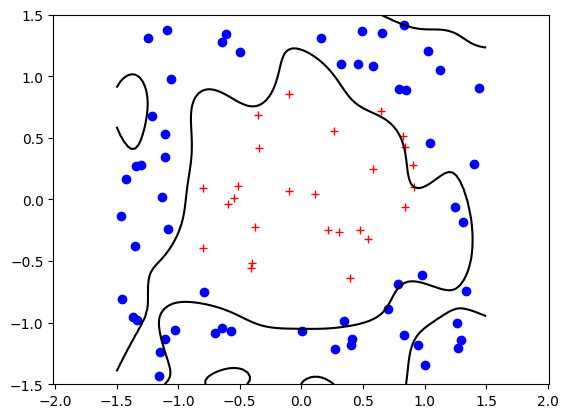

Test error: 0.20
Exponential kernel with gamma = 10


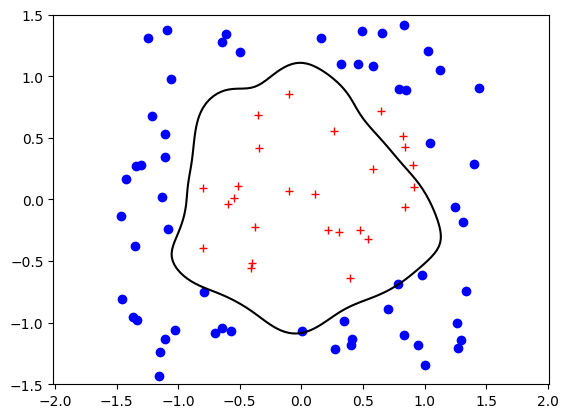

Test error: 0.07
Exponential kernel with gamma = 100


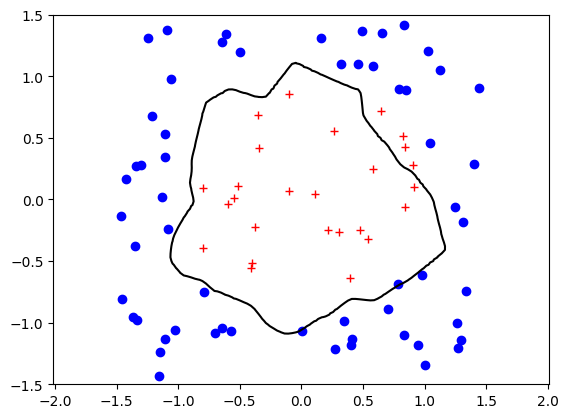

Test error: 0.06


In [17]:
def exponential_kernel(x, y, gamma):
    return np.exp(-gamma * np.sum((x - y) ** 2))

def kernel_matrix(X, kernel, gamma):
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j], gamma)
    return K

def predict_value(x, X_data, alpha, kernel, gamma):
    n = len(X_data)
    y_pred = 0.
    for i in range(n):
        y_pred += alpha[i] * kernel(X_data[i], x, gamma)
    return y_pred

def predict(X, X_data, alpha, kernel, gamma):
    n = len(X)
    y_pred = np.zeros(n)
    for i in range(n):
        y_pred[i] = predict_value(X[i], X_data, alpha, kernel, gamma)
    return y_pred

for gamma in [1, 10, 100]:

    print(f"Exponential kernel with gamma = {gamma}")

    K_expontential = kernel_matrix(X, exponential_kernel, gamma=gamma)
    alpha = np.linalg.solve(K_expontential, y)

    # plot the data points
    plt.plot(X_test[y_test == -1, 0], X_test[y_test == -1, 1], "o", color="b")
    plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], "+", color="r")
    # plot polynomial boundary
    x = np.linspace(-1.5, 1.5, 100)
    xx, yy = np.meshgrid(x, x)
    Z = predict(np.c_[xx.ravel(), yy.ravel()], X, alpha, exponential_kernel, gamma=gamma)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors="k")
    plt.axis("equal")
    plt.show()
    
    # test error
    # COMPUTE TEST ERROR on X_test, y_test
    X_test_poly = K_expontential = kernel_matrix(X_test, exponential_kernel, gamma=gamma)
    y_test_pred = predict(X_test, X, alpha, exponential_kernel, gamma)
    test_error = np.sum((y_test * y_test_pred) < 0) / len(y_test)

    print(f"Test error: {test_error:.2f}")

# WHICH GAMMA GIVES THE BEST TEST ERROR?
100